In [1]:
import sys
sys.path.append('..')
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib as mpl
from itertools import tee
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.colors import Normalize
from matplotlib.ticker import FormatStrFormatter
from evidence_theory import core, experiment
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
N = 10000  # number of samples
m = 8  # number of elements in X
f_name = f"results{m}.csv"
entropy_measures = [
    core.lamata_moral,
    core.pal_et_al,
    core.deng,
    core.jirousek_and_shenoy,
    core.qin_et_al,
    core.yan_and_deng,
    core.li_et_al,
    core.harmanec_and_klir,
    core.li_and_pan,
    core.pan_and_deng,
    core.deng_and_wang,
    core.jousselme_et_al,
    core.yang_and_han,
    core.fractal_based_entropy,
    core.cui_et_al,
    core.wang_and_song,
    core.zhou_et_al,
]
if f_name in os.listdir():
    r = pd.read_csv(f_name, index_col=0)
else:
    r = experiment.experiment(N, m, entropy_measures)
    r.to_csv(f_name)

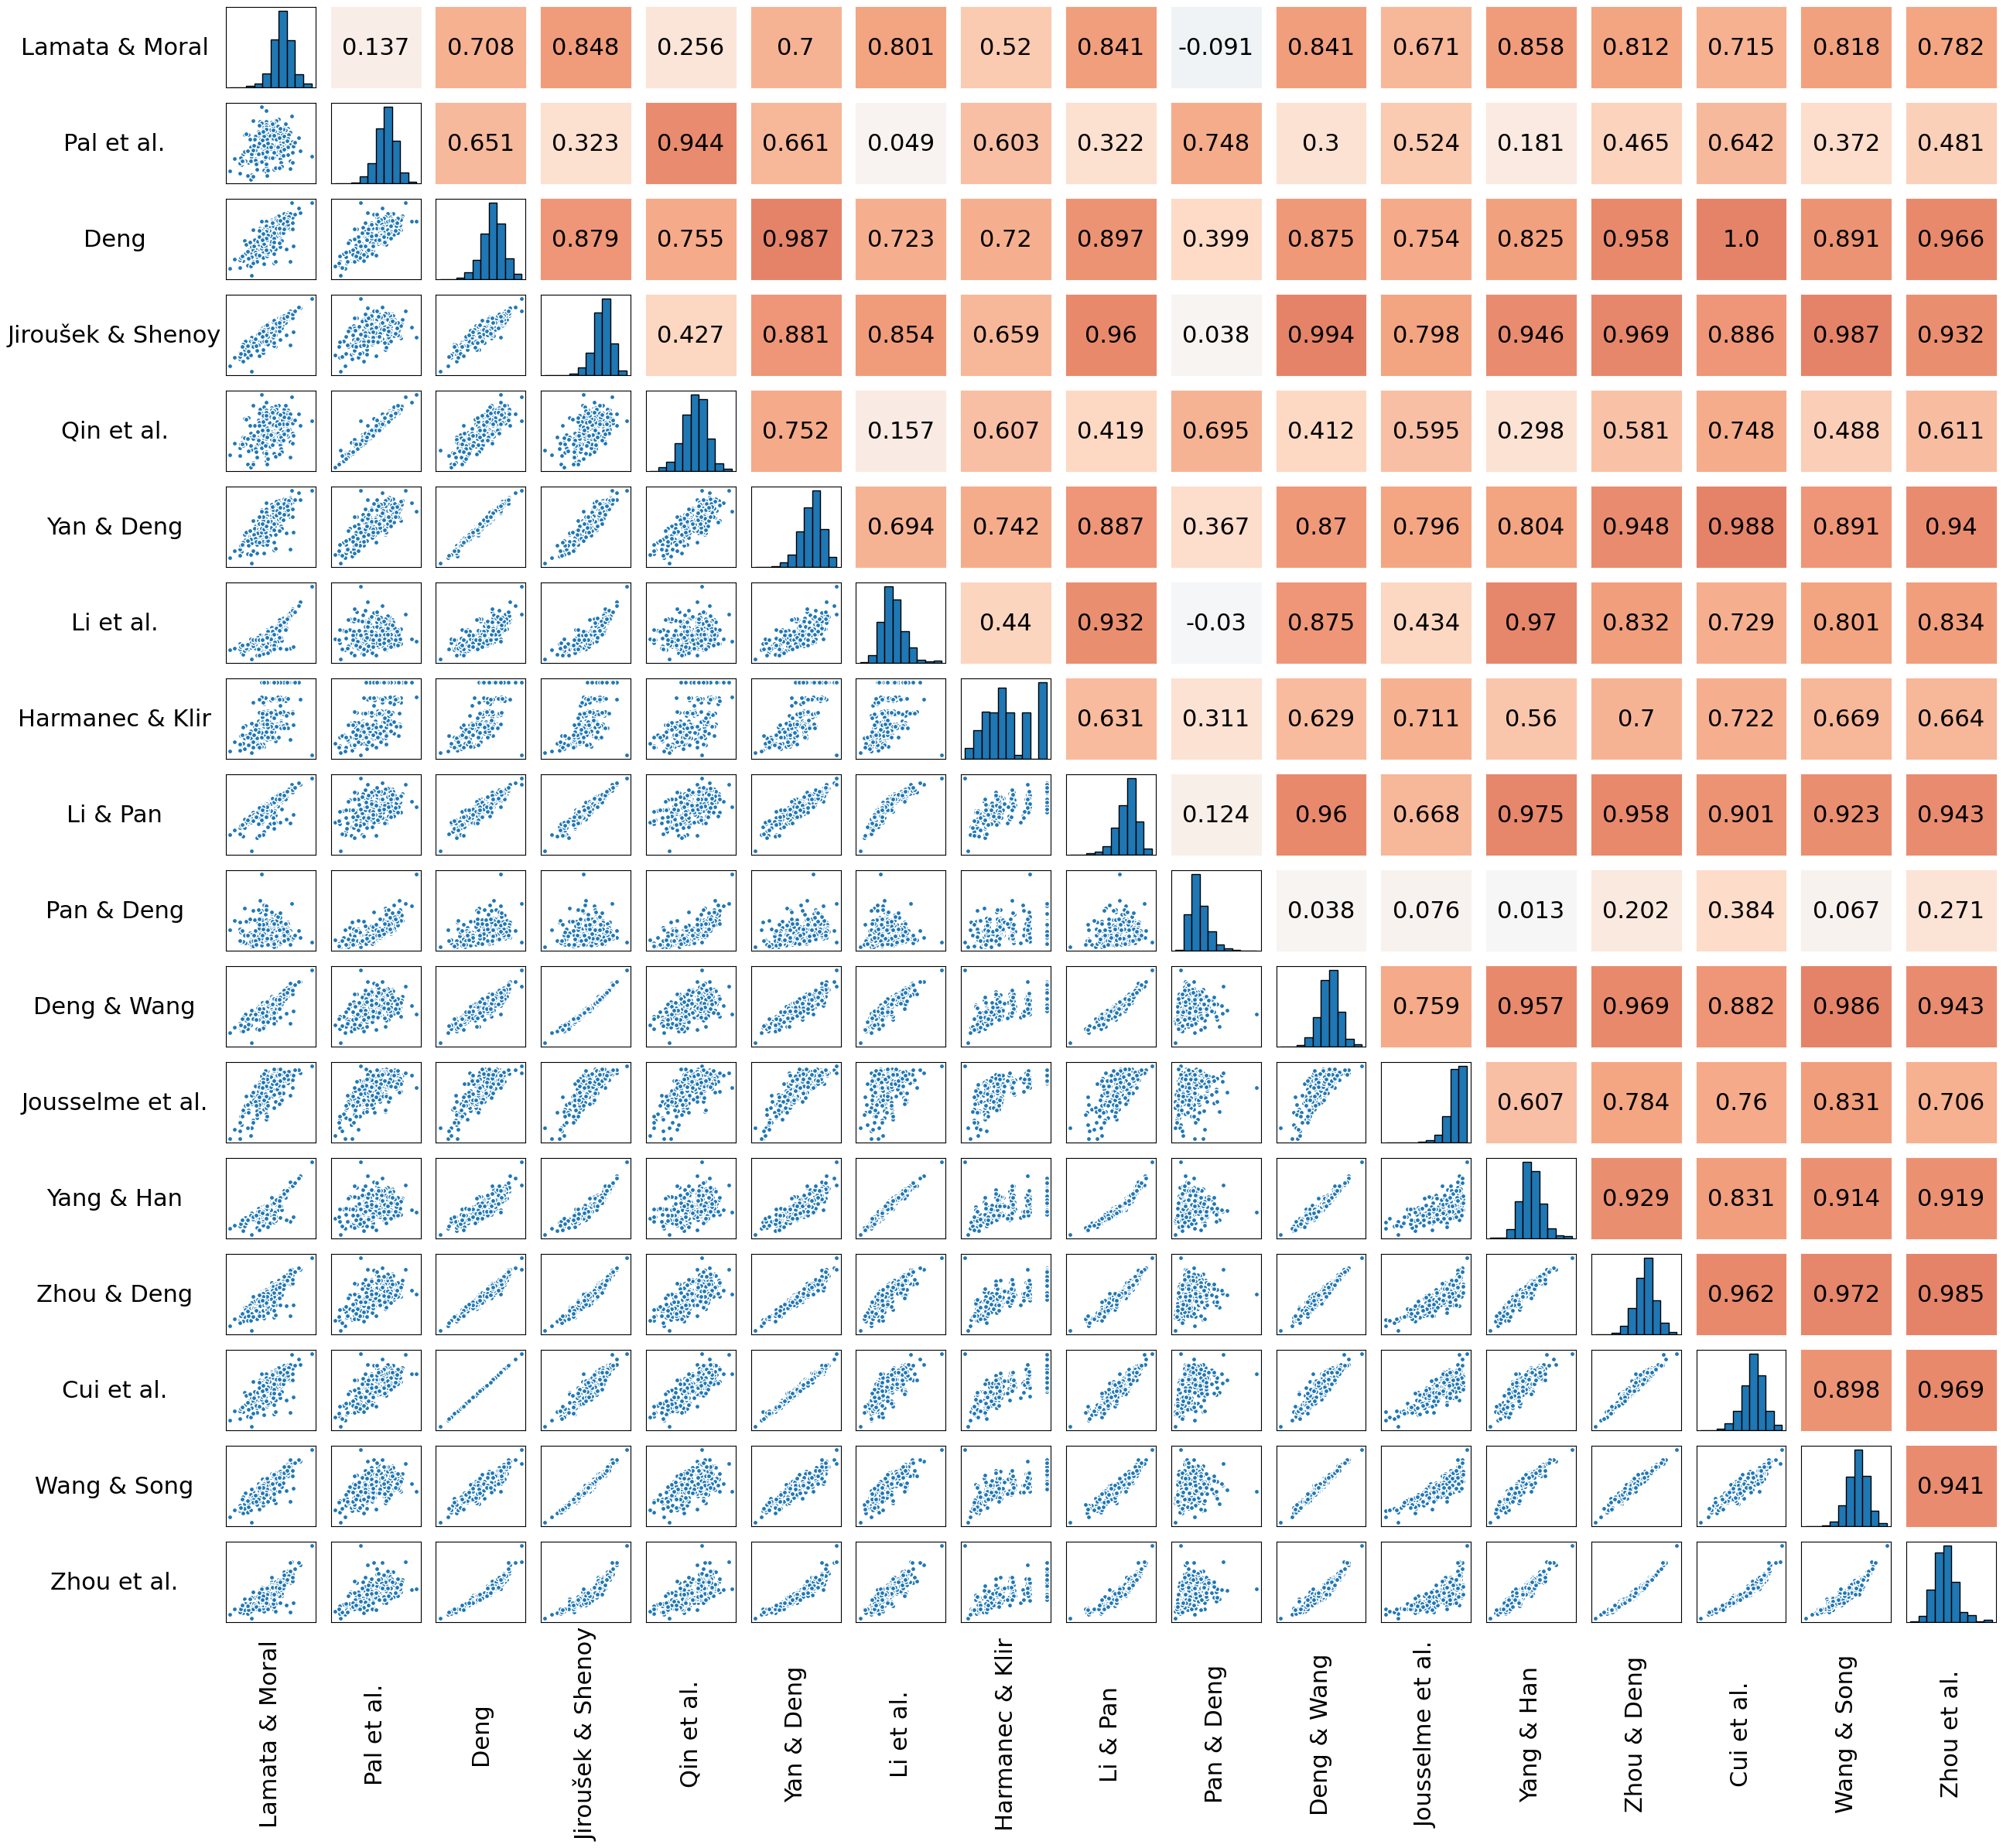

In [3]:
n = len(entropy_measures)
k = 300  # number of points in the scatterplot
r = r.filter(items=[i.__name__ for i in entropy_measures])
sp = r.corr(method="spearman")
cmap = mpl.cm.RdBu_r
norm = mpl.colors.Normalize(
    vmin=-2,
    vmax=2
)
fig, axs = plt.subplots(n, n,
                        figsize=(26, 24)
                        )
cols = r.columns
names = [i.name for i in entropy_measures]
text_kwargs = dict(ha='center', va='center', fontsize=22, color='k')
# add color map
for i in range(n - 1):
    for j in range(i + 1, n):
        ax = axs[i, j]
        # Select face color using the scatter map
        f_color = cmap(norm(sp.to_numpy()[i, j]))
        ax.set_facecolor(f_color)
        # remove frame
        for pos in ['top', 'bottom', 'right', 'left']:
            ax.spines[pos].set_edgecolor(f_color)
        # add coefficient
        ax.text(0.5, 0.5, np.round(sp.to_numpy()[i, j], decimals=3), text_kwargs)
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

# add histograms
for i in range(n):
    ax = axs[i, i]
    ax.hist(
        r[cols[i]],
        edgecolor='k',
        rasterized=True
    )
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])

# add scatter
for i in range(n - 1, 0, -1):
    for j in range(i - 1, -1, -1):
        ax = axs[i, j]
        ax.scatter(
            r[cols[j]].to_numpy()[:k],
            r[cols[i]].to_numpy()[:k],
            s=20,
            edgecolor='w',
            rasterized=True
        )
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

# set measure names
for i in range(n):
    axs[n - 1, i].set_xlabel(names[i], rotation=90, labelpad=100, **text_kwargs)
    axs[n - 1, i].tick_params(axis='x', rotation=90)
    axs[i, 0].set_ylabel(names[i], rotation=0, labelpad=100, **text_kwargs)
plt.tight_layout()
fn = f'scatter_heat{m}'
plt.savefig(fn + '.pdf')
plt.savefig(fn + '.png')

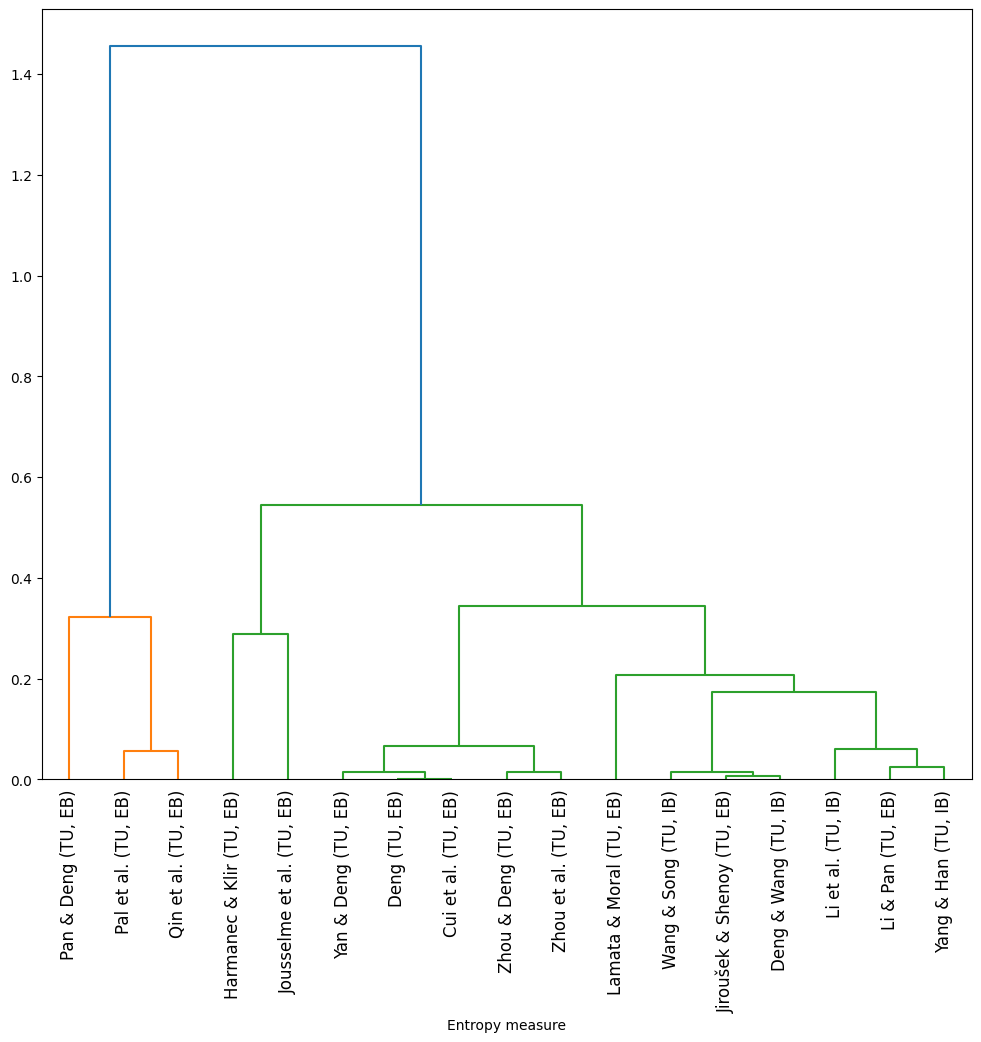

In [4]:
sp = r.corr(method="spearman")
p_dist = abs(1 - sp)
dist = squareform(p_dist)
z = linkage(dist, method='ward')
names = [(i.name, i.classification) for i in entropy_measures]
# plot the top three levels of the dendrogram
fig, ax = plt.subplots(figsize=(12, 10))
dendrogram(
    Z=z,
    leaf_label_func=lambda x: f"{names[x][0]} ({names[x][1]})",
    leaf_rotation=90,
    **{'ax': ax}
)
plt.xlabel("Entropy measure")
plt.savefig('dendrogram.pdf', dpi=300)

In [5]:
1 - sp['jirousek_and_shenoy']

lamata_moral             0.152455
pal_et_al                0.677208
deng                     0.121322
jirousek_and_shenoy      0.000000
qin_et_al                0.573238
yan_and_deng             0.118638
li_et_al                 0.145817
harmanec_and_klir        0.340533
li_and_pan               0.040389
pan_and_deng             0.962100
deng_and_wang            0.006452
jousselme_et_al          0.201795
yang_and_han             0.054362
fractal_based_entropy    0.031062
cui_et_al                0.113890
wang_and_song            0.012519
zhou_et_al               0.067720
Name: jirousek_and_shenoy, dtype: float64

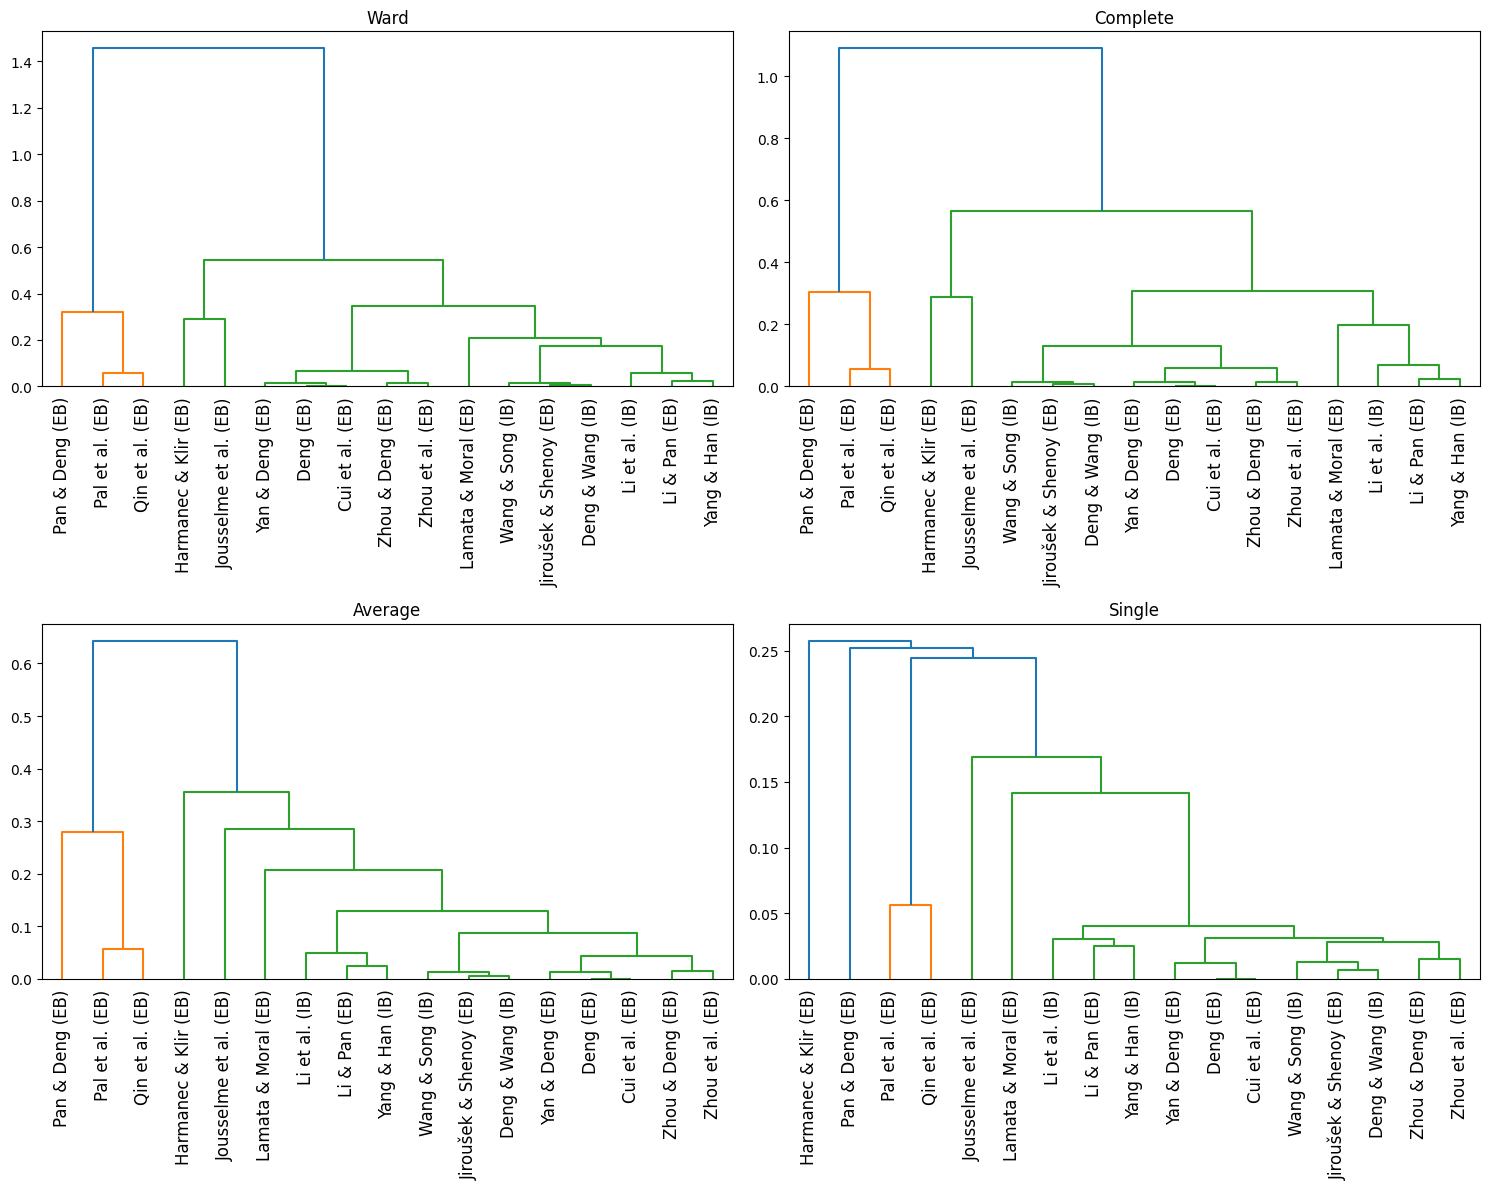

In [12]:
sp = r.corr(method="spearman")
sp = abs(1-sp)
names = [(i.name, i.classification) for i in entropy_measures]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
text_args = dict(fontsize=20)
c_method = ["ward", "complete", "average", "single"]
for i, m in enumerate(c_method):
    dist = squareform(sp.to_numpy())
    z = linkage(dist, method=m)
    ax = axs[int(np.floor(i / 2)), i % 2]
    ax.set_title(m.capitalize())
    dendrogram(z,
        leaf_label_func=lambda x: f"{names[x][0]} ({names[x][1][-2:]})",
        leaf_rotation=90,
        **{'ax': ax}
    )
plt.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.savefig('dendrogram_multi.pdf', dpi=400)

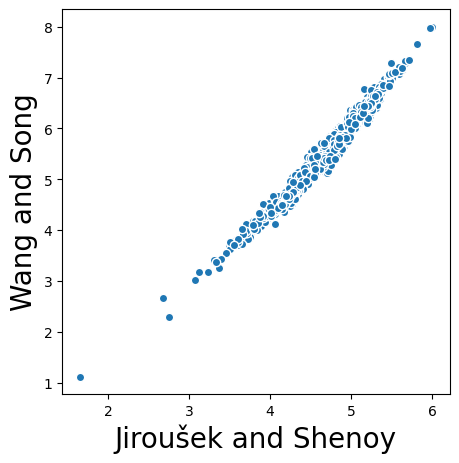

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
m = 1000
text_args = dict(fontsize=20)
ax.scatter(
    r['jirousek_and_shenoy'].to_numpy()[:m],
    r['wang_and_song'].to_numpy()[:m],
    edgecolor='w',
    rasterized=True
)
ax.set_xlabel('Jiroušek and Shenoy', **text_args)
ax.set_ylabel('Wang and Song', **text_args)
plt.savefig('comparison1.pdf', dpi=300)

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
m = 1000
text_args = dict(fontsize=20)
ax.scatter(
    r['harmanec_and_klir'].to_numpy()[:m],
    r['li_et_al'].to_numpy()[:m],
    edgecolor='w',
    rasterized=True
)
ax.set_xlabel('Harmanec and Klir', **text_args)
ax.set_ylabel('Li et al.', **text_args)
plt.savefig('comparison2.pdf', dpi=300)

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
m = 1000
text_args = dict(fontsize=20)
ax.scatter(
    r['lamata_moral'].to_numpy()[:m],
    r['pan_and_deng'].to_numpy()[:m],
    edgecolor='w',
    rasterized=True
)
ax.set_xlabel('Lamata and Moral', **text_args)
ax.set_ylabel('Pan and Deng', **text_args)
plt.savefig('comparison3.pdf', dpi=300)

In [10]:
fig, ax = plt.subplots(figsize=(6,5))
text_args = dict(fontsize=20)
ax.hist(
    r['jousselme_et_al'],
    edgecolor='k',
    rasterized=True
)
ax.set_title('Jousselme et al.', **text_args)
ax.set_xlabel('Uncertainty', **text_args)
ax.set_ylabel('Frequency', **text_args)
plt.savefig('entropy1.pdf', dpi=300)

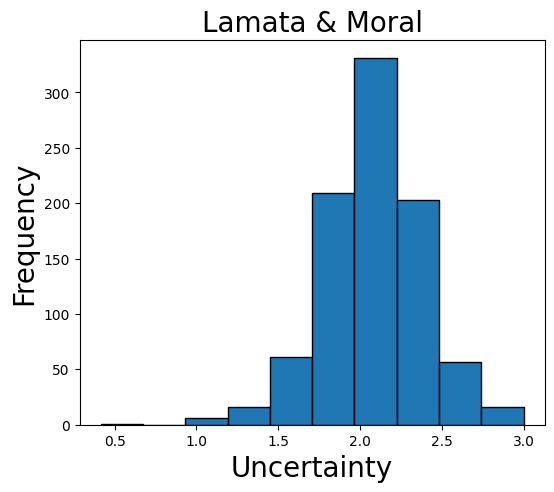

In [11]:
fig, ax = plt.subplots(figsize=(6,5))
text_args = dict(fontsize=20)
ax.hist(
    r['lamata_moral'],
    edgecolor='k',
    rasterized=True
)
ax.set_title('Lamata & Moral', **text_args)
ax.set_xlabel('Uncertainty', **text_args)
ax.set_ylabel('Frequency', **text_args)
plt.savefig('entropy2.pdf', dpi=300)